In [1]:
%matplotlib notebook
import torch
import matplotlib.pyplot as plt
from data import BirdsDataset
from argument import Args
from model import VGG16Transfer, ClassificationStatsManager, Resnet18Transfer
import nntools as nt
from utils import imshow, plot

In [2]:
args = Args()

In [3]:
vars(args)

{'root_dir': '../dataset/',
 'output_dir': '../checkpoints/',
 'num_epochs': 20,
 'plot': False,
 'model': 'vgg',
 'lr': 0.001,
 'image_size': (224, 224),
 'batch_size': 16}

In [4]:
args.plot=True

<IPython.core.display.Javascript object>


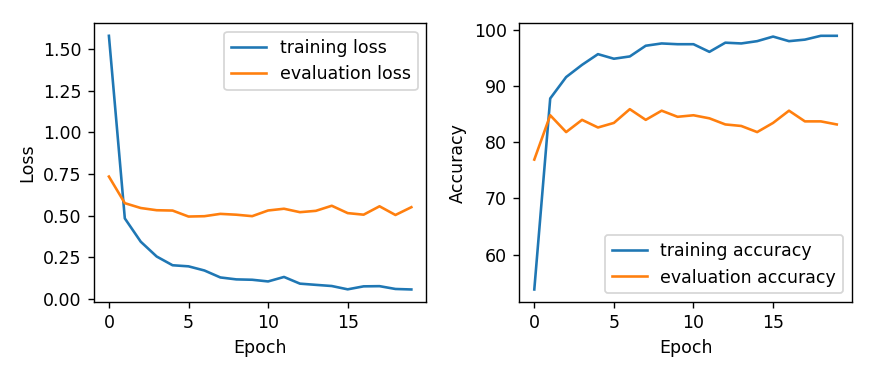

Start/Continue training from epoch 0
Epoch 1 | Time: 15.31s | Training Loss: 1.579827 | Evaluation Loss: 0.735421
Epoch 2 | Time: 16.88s | Training Loss: 0.484397 | Evaluation Loss: 0.575804
Epoch 3 | Time: 16.69s | Training Loss: 0.344628 | Evaluation Loss: 0.546770
Epoch 4 | Time: 16.49s | Training Loss: 0.255804 | Evaluation Loss: 0.533436
Epoch 5 | Time: 16.61s | Training Loss: 0.203335 | Evaluation Loss: 0.531494
Epoch 6 | Time: 16.51s | Training Loss: 0.196841 | Evaluation Loss: 0.495609
Epoch 7 | Time: 16.27s | Training Loss: 0.171930 | Evaluation Loss: 0.497623
Epoch 8 | Time: 16.21s | Training Loss: 0.130213 | Evaluation Loss: 0.511590
Epoch 9 | Time: 16.64s | Training Loss: 0.118600 | Evaluation Loss: 0.506606
Epoch 10 | Time: 15.69s | Training Loss: 0.116316 | Evaluation Loss: 0.497882
Epoch 11 | Time: 15.65s | Training Loss: 0.106292 | Evaluation Loss: 0.531919
Epoch 12 | Time: 17.42s | Training Loss: 0.133141 | Evaluation Loss: 0.542378
Epoch 13 | Time: 16.73s | Training L

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
train_set = BirdsDataset(args.root_dir, image_size=args.image_size)
val_set = BirdsDataset(args.root_dir, mode='val',
                       image_size=args.image_size)
num_classes = train_set.number_of_classes()

if args.model == 'vgg':
    net = VGG16Transfer(num_classes)
else:
    net = Resnet18Transfer(num_classes)
net = net.to(device)
adam = torch.optim.Adam(net.parameters(), lr=args.lr)
stats_manager = ClassificationStatsManager()
exp = nt.Experiment(net, train_set, val_set, adam, stats_manager, batch_size=args.batch_size,
                    output_dir=args.output_dir, perform_validation_during_training=True)

if args.plot:
    fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
    exp.run(num_epochs=args.num_epochs,
            plot=lambda exp: plot(exp, fig=fig, axes=axes))
else:
    exp.run(num_epochs=args.num_epochs)